In [ ]:
import pandas as pd
file_path = '/content/taxi_trip_pricing.csv'
data = pd.read_csv(file_path)


data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [ ]:
data.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [ ]:
data.isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [ ]:
data['Trip_Distance_km'].fillna(data['Trip_Distance_km'].mean(), inplace=True)
data['Passenger_Count'].fillna(data['Passenger_Count'].median(), inplace=True)
data['Base_Fare'].fillna(data['Base_Fare'].mean(), inplace=True)
data['Per_Km_Rate'].fillna(data['Per_Km_Rate'].mean(), inplace=True)
data['Per_Minute_Rate'].fillna(data['Per_Minute_Rate'].mean(), inplace=True)
data['Trip_Duration_Minutes'].fillna(data['Trip_Duration_Minutes'].median(), inplace=True)
data['Trip_Price'].fillna(data['Trip_Price'].mean(), inplace=True)

<ipython-input-7-29bf69b8202c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Trip_Distance_km'].fillna(data['Trip_Distance_km'].mean(), inplace=True)
<ipython-input-7-29bf69b8202c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [ ]:
for column in ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']:
    data[column].fillna(data[column].mode()[0], inplace=True)

<ipython-input-8-3e424d8bd794>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


In [ ]:
data.isnull().sum()

,0
Trip_Distance_km,0
Time_of_Day,0
Day_of_Week,0
Passenger_Count,0
Traffic_Conditions,0
Weather,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

# Initialize the LabelEncoder
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [ ]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.350000,2,0,3.0,1,0,3.560000,0.80,0.32,53.82,36.262400
1,47.590000,0,0,1.0,0,0,3.502989,0.62,0.43,40.57,56.874773
2,36.870000,1,1,1.0,0,0,2.700000,1.21,0.15,37.27,52.903200
3,30.330000,1,0,4.0,1,0,3.480000,0.51,0.15,116.81,36.469800
4,27.070547,1,0,3.0,0,0,2.930000,0.63,0.32,22.64,15.618000


In [ ]:
from sklearn.preprocessing import StandardScaler
numerical_columns = [
    'Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
    'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'
]

scaler = StandardScaler()
data_standardized = data.copy()
data_standardized[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data_standardized.head()


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,-3.981496e-01,2,0,0.507049,1,0,0.067255,-1.034878,0.240523,-0.264502,-0.522559
1,1.058191e+00,0,0,-1.346878,0,0,0.000000,-1.464767,1.217383,-0.687503,0.000000
2,5.053590e-01,1,1,-1.346878,0,0,-0.947276,-0.055685,-1.269171,-0.792855,-0.100686
3,1.680904e-01,1,0,1.434012,1,0,-0.027120,-1.727477,-1.269171,1.746429,-0.517301
4,1.832139e-16,1,0,0.507049,0,0,-0.675948,-1.440884,0.240523,-1.259912,-1.045930


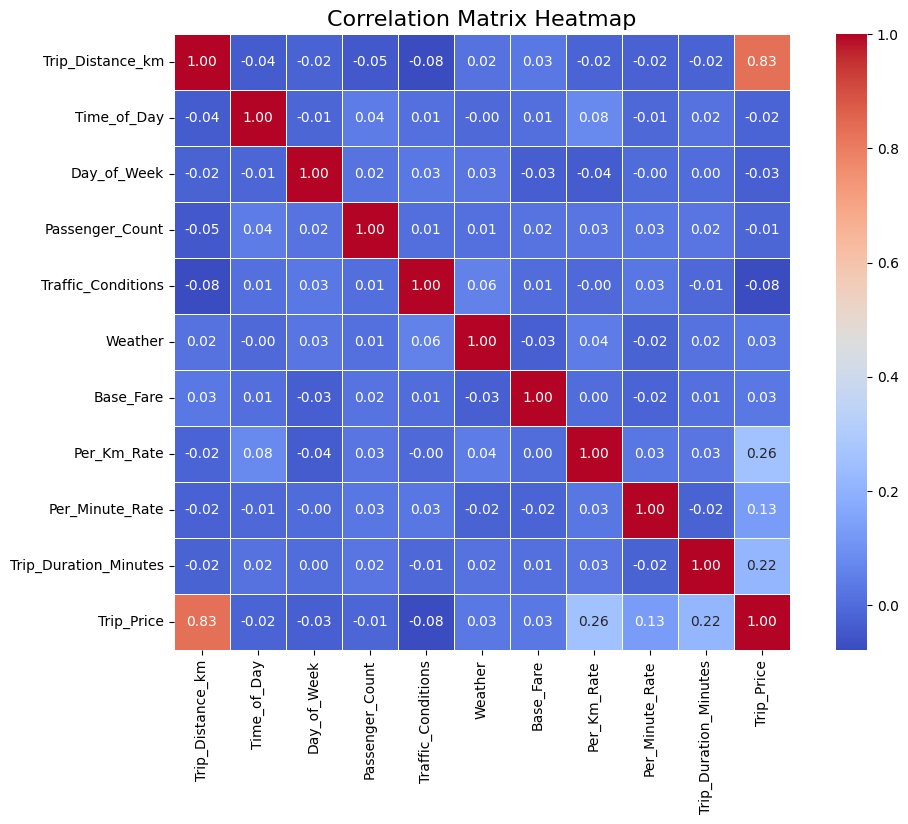

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data_standardized.corr()
plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()


Text(0, 0.5, 'Frequency')

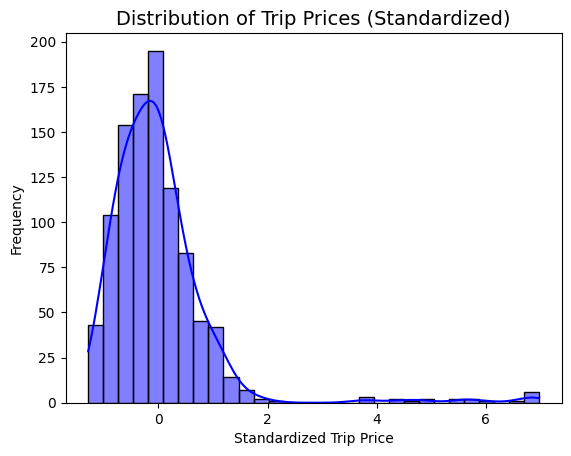

In [ ]:
# Distribution of Trip Prices after standardization
sns.histplot(data_standardized['Trip_Price'], kde=True, bins=30, color="blue")
plt.title("Distribution of Trip Prices (Standardized)", fontsize=14)
plt.xlabel("Standardized Trip Price")
plt.ylabel("Frequency")



<ipython-input-22-b34976a18da0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


Text(0, 0.5, 'Trip Duration (Minutes)')

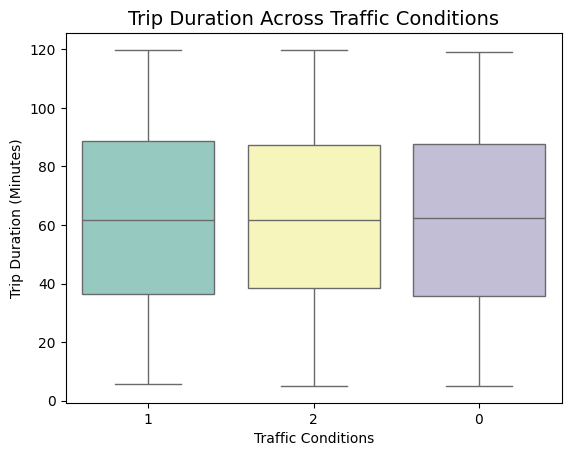

In [ ]:
#Box plot of Trip Duration vs. Traffic Conditions
sns.boxplot(
    x='Traffic_Conditions',
    y='Trip_Duration_Minutes',
    data=data,
    palette="Set3",
    order=data['Traffic_Conditions'].value_counts().index,
)
plt.title("Trip Duration Across Traffic Conditions", fontsize=14)
plt.xlabel("Traffic Conditions")
plt.ylabel("Trip Duration (Minutes)")

#low,med,high

Text(0, 0.5, 'Trip Distance (km)')

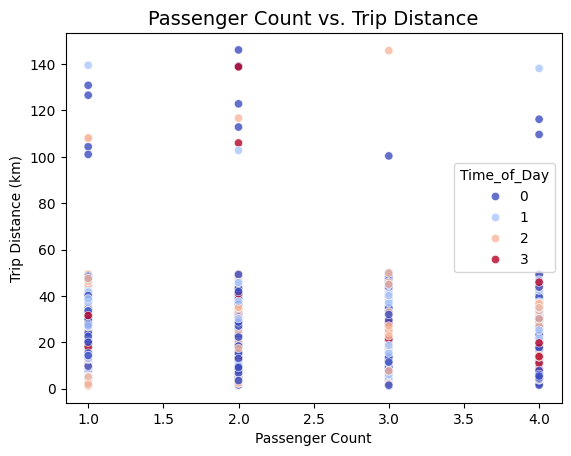

In [ ]:
#Passenger Count vs. Trip Distance Scatter Plot
sns.scatterplot(
    x='Passenger_Count',
    y='Trip_Distance_km',
    data=data,
    hue='Time_of_Day',
    palette="coolwarm",
    alpha=0.8
)
plt.title("Passenger Count vs. Trip Distance", fontsize=14)
plt.xlabel("Passenger Count")
plt.ylabel("Trip Distance (km)")

#morn,afternoon,eve,night

<ipython-input-20-9df14d5a24a8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


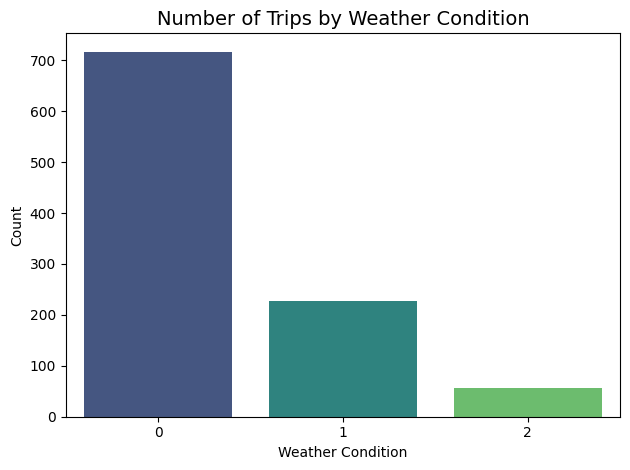

In [ ]:
#Count of Trips by Weather Condition
sns.countplot(
    x='Weather',
    data=data,
    order=data['Weather'].value_counts().index,
    palette="viridis"
)
plt.title("Number of Trips by Weather Condition", fontsize=14)
plt.xlabel("Weather Condition")
plt.ylabel("Count")

plt.tight_layout()
plt.show()
#clear,rain,snow

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define features (X) and target (y)
X = data_standardized.drop(['Trip_Price'], axis=1)  # Drop the target column
y = data_standardized['Trip_Price']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

# Print evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Model Accuracy (R² as percentage): {accuracy:.2f}%")


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 0.12
Mean Absolute Error (MAE): 0.25
R² Score: 0.77
Model Accuracy (R² as percentage): 76.72%


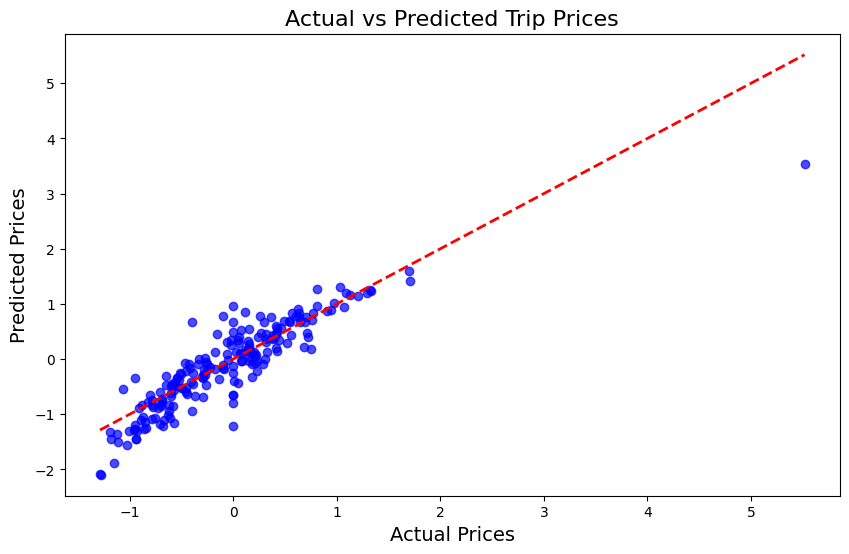

In [ ]:
# Display Actual vs Predicted Prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Actual vs Predicted Trip Prices", fontsize=16)
plt.xlabel("Actual Prices", fontsize=14)
plt.ylabel("Predicted Prices", fontsize=14)
plt.show()


Ridge Regression Model Evaluation:
Mean Squared Error (MSE): 0.12
Mean Absolute Error (MAE): 0.25
R² Score: 0.77
Model Accuracy (R² as percentage): 76.90%


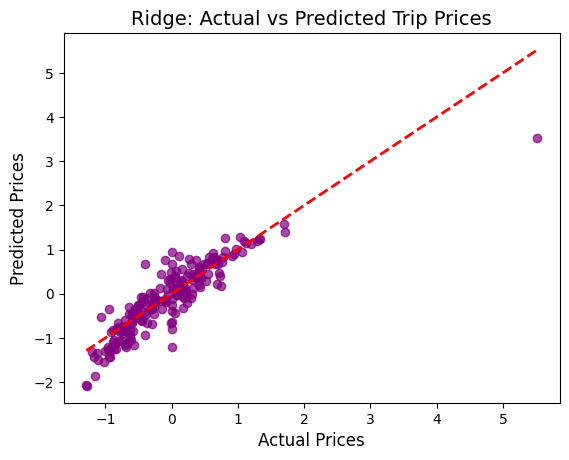

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
ridge_model = Ridge(alpha=4.0, random_state=42)
# Train Ridge
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
# Evaluate Ridge
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_accuracy = ridge_r2 * 100


print("\nRidge Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {ridge_mse:.2f}")
print(f"Mean Absolute Error (MAE): {ridge_mae:.2f}")
print(f"R² Score: {ridge_r2:.2f}")
print(f"Model Accuracy (R² as percentage): {ridge_accuracy:.2f}%")

# Ridge: Actual vs Predicted
plt.scatter(y_test, ridge_pred, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Ridge: Actual vs Predicted Trip Prices", fontsize=14)
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)
plt.show()



Polynomial Regression Model Evaluation:
Mean Squared Error (MSE): 0.05
Mean Absolute Error (MAE): 0.14
R² Score: 0.90
Model Accuracy (R² as percentage): 90.48%


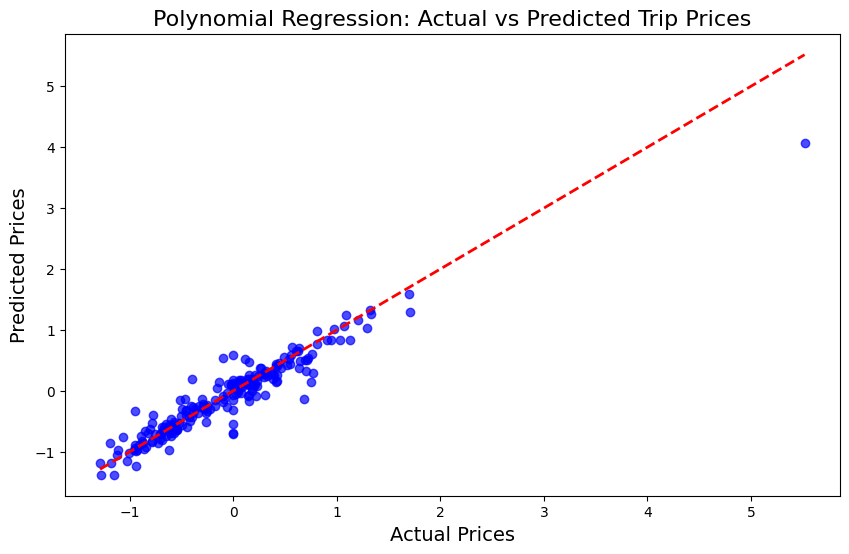

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Transform the features to a polynomial space (degree=2 as an example)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)  # Transform the features

# Split polynomial features into training and testing sets
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train a linear regression model on the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Make predictions
y_poly_pred = poly_model.predict(X_poly_test)

# Evaluate the model
poly_mse = mean_squared_error(y_test, y_poly_pred)
poly_mae = mean_absolute_error(y_test, y_poly_pred)
poly_r2 = r2_score(y_test, y_poly_pred)
poly_accuracy = poly_r2 * 100  # Accuracy as R² percentage

# Print evaluation metrics
print("Polynomial Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {poly_mse:.2f}")
print(f"Mean Absolute Error (MAE): {poly_mae:.2f}")
print(f"R² Score: {poly_r2:.2f}")
print(f"Model Accuracy (R² as percentage): {poly_accuracy:.2f}%")

# Visualization of Actual vs Predicted Trip Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_poly_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Polynomial Regression: Actual vs Predicted Trip Prices", fontsize=16)
plt.xlabel("Actual Prices", fontsize=14)
plt.ylabel("Predicted Prices", fontsize=14)
plt.show()


Decision Tree Regression Model Evaluation:
Mean Squared Error (MSE): 0.10
Mean Absolute Error (MAE): 0.23
R² Score: 0.82
Model Accuracy (R² as percentage): 81.59%


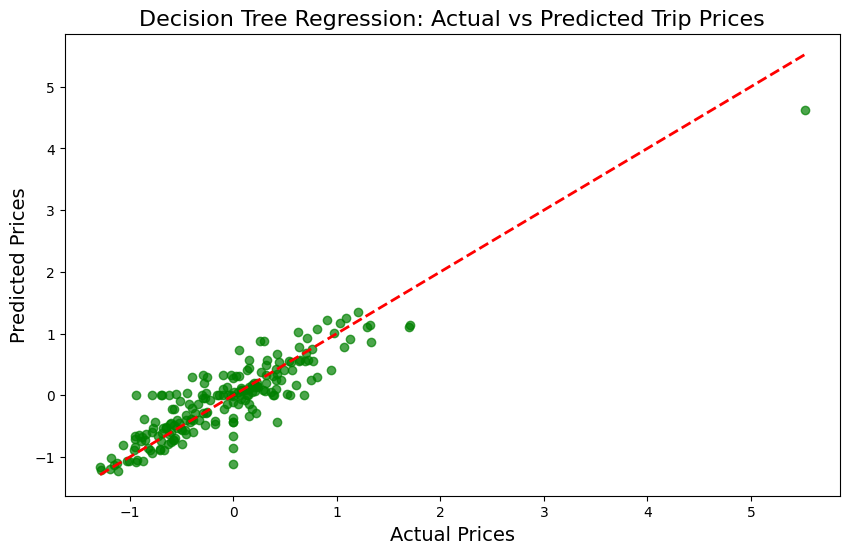

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_tree_pred = decision_tree_model.predict(X_test)

# Evaluate the model
tree_mse = mean_squared_error(y_test, y_tree_pred)
tree_mae = mean_absolute_error(y_test, y_tree_pred)
tree_r2 = r2_score(y_test, y_tree_pred)
tree_accuracy = tree_r2 * 100  # Accuracy as R² percentage

# Print evaluation metrics
print("Decision Tree Regression Model Evaluation:")
print(f"Mean Squared Error (MSE): {tree_mse:.2f}")
print(f"Mean Absolute Error (MAE): {tree_mae:.2f}")
print(f"R² Score: {tree_r2:.2f}")
print(f"Model Accuracy (R² as percentage): {tree_accuracy:.2f}%")

# Visualization of Actual vs Predicted Prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_tree_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Decision Tree Regression: Actual vs Predicted Trip Prices", fontsize=16)
plt.xlabel("Actual Prices", fontsize=14)
plt.ylabel("Predicted Prices", fontsize=14)
plt.show()


Model Evaluation Summary:
                   Model       MSE       MAE        R²  Accuracy (%)
0      Linear Regression  0.124267  0.250913  0.767151     76.715109
1  Polynomial Regression  0.050825  0.142595  0.904765     90.476491
2          Decision Tree  0.098249  0.231444  0.815903     81.590344
3       Ridge Regression  0.123276  0.249474  0.769008     76.900797


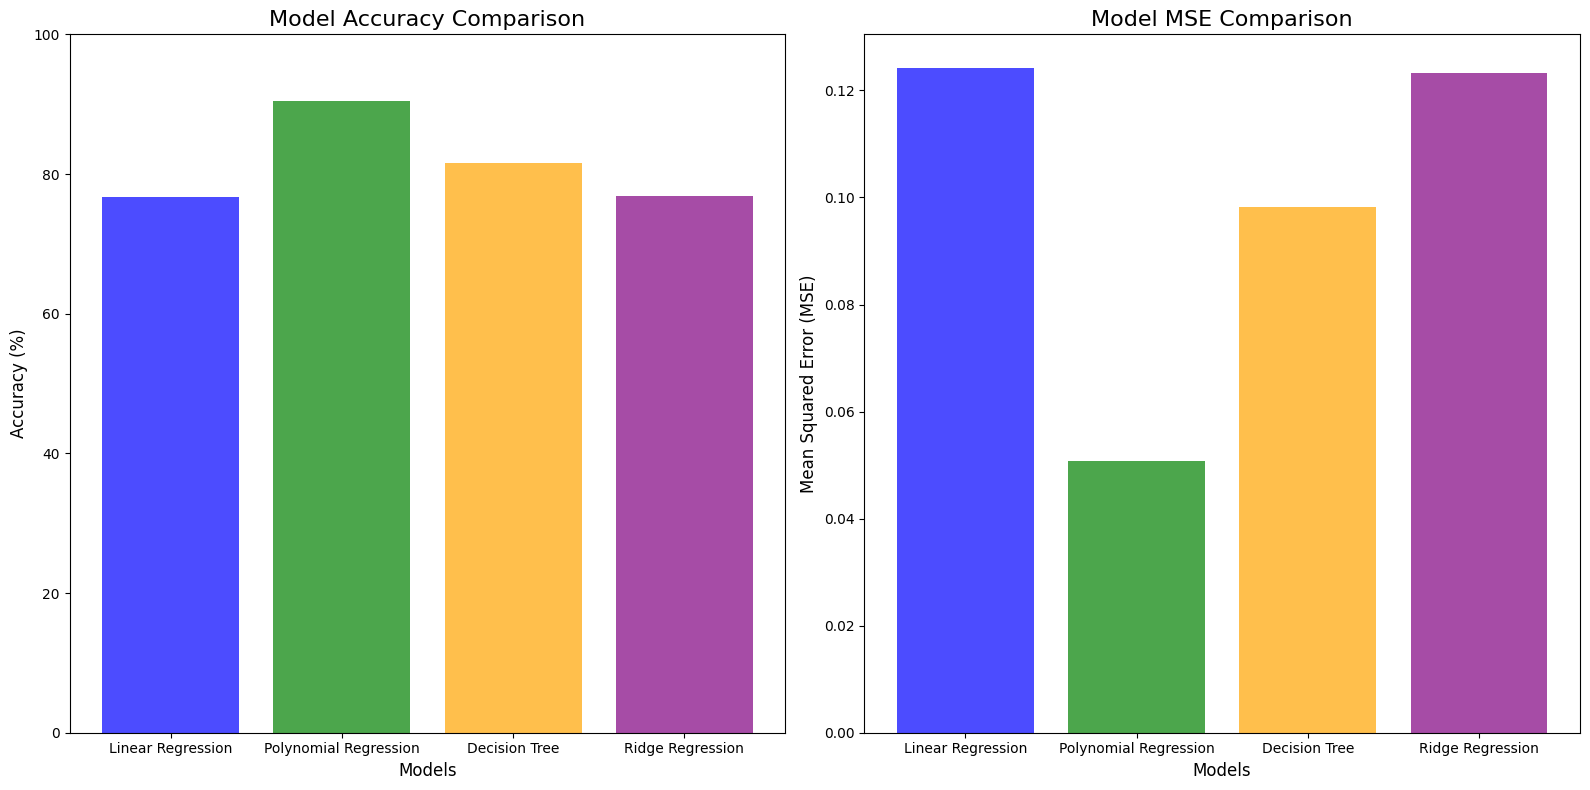

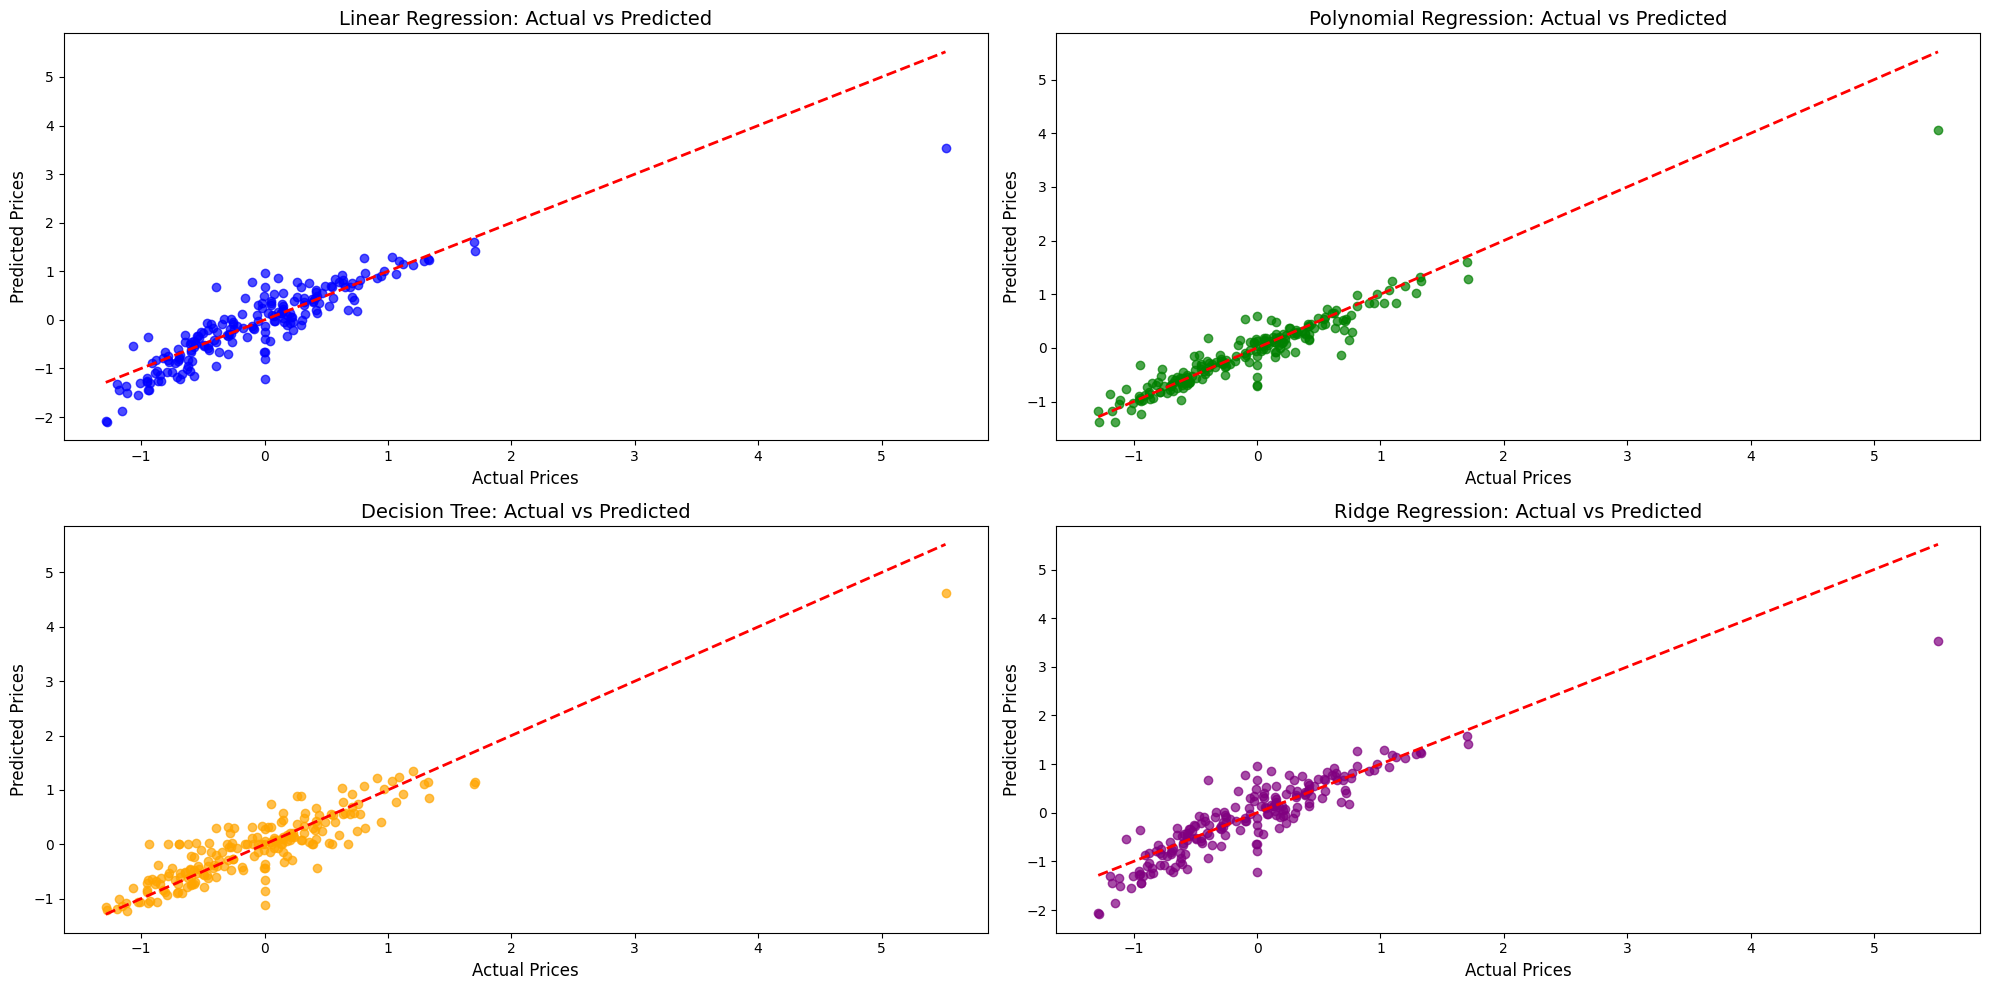

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Store evaluation metrics for all models
model_results = {
    'Model': ['Linear Regression', 'Polynomial Regression', 'Decision Tree', 'Ridge Regression'],
    'MSE': [mse, poly_mse, tree_mse,  ridge_mse],
    'MAE': [mae, poly_mae, tree_mae,  ridge_mae],
    'R²': [r2, poly_r2, tree_r2,  ridge_r2],
    'Accuracy (%)': [accuracy, poly_accuracy, tree_accuracy, ridge_accuracy]
}

# Convert to DataFrame
results_df = pd.DataFrame(model_results)

# Display the table
print("Model Evaluation Summary:")
print(results_df)

# Visualize the metrics
plt.figure(figsize=(16, 8))

# Accuracy Comparison
plt.subplot(1, 2, 1)
plt.bar(results_df['Model'], results_df['Accuracy (%)'], color=['blue', 'green', 'orange', 'purple'], alpha=0.7)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 100)

# MSE Comparison
plt.subplot(1, 2, 2)
plt.bar(results_df['Model'], results_df['MSE'], color=['blue', 'green', 'orange', 'purple'], alpha=0.7)
plt.title('Model MSE Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)

plt.tight_layout()
plt.show()

# Scatter Plots of Actual vs Predicted for Comparison
plt.figure(figsize=(20, 10))

# Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Linear Regression: Actual vs Predicted", fontsize=14)
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)

# Polynomial Regression
plt.subplot(2, 2, 2)
plt.scatter(y_test, y_poly_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Polynomial Regression: Actual vs Predicted", fontsize=14)
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)

# Decision Tree
plt.subplot(2, 2, 3)
plt.scatter(y_test, y_tree_pred, alpha=0.7, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Decision Tree: Actual vs Predicted", fontsize=14)
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)

# Ridge Regression
plt.subplot(2, 2, 4)
plt.scatter(y_test, ridge_pred, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title("Ridge Regression: Actual vs Predicted", fontsize=14)
plt.xlabel("Actual Prices", fontsize=12)
plt.ylabel("Predicted Prices", fontsize=12)

plt.tight_layout()
plt.show()
